In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

plt.style.use('default')

## `Problem 1 to 5`:

Dataset link: https://tinyurl.com/2fe6vz4u

**Add a label to every axis and add a proper title for the charts. Also add proper labels if there are multiple representations.** Then, you can customize it as your wish.

### **`Problem-1:`** Draw a line plot of which, the x-axis is the "Year" and the y-axis is sum of "PM2.5" of two countries Iran and China.

In [6]:
# code here
df = pd.read_csv('https://tinyurl.com/2fe6vz4u').drop(columns="Unnamed: 0")
df.head()

,Position,Country,City/Town,Year,PM2.5,Temporal coverage,PM10,Temporal coverage.1,Database version (year)
0,1,India,Kanpur,2016,173,>75%,319,NaN,2018
1,2,India,Faridabad,2016,172,>75%,316,NaN,2018
2,3,India,Gaya,2016,149,50% -< 75%,275,NaN,2018
3,4,India,Varanasi,2016,146,>75%,260,NaN,2018
4,5,India,Patna,2016,144,>75%,266,NaN,2018


In [16]:
iran

Year
2012      37
2013      66
2014      31
2016    1453
Name: PM2.5, dtype: int64

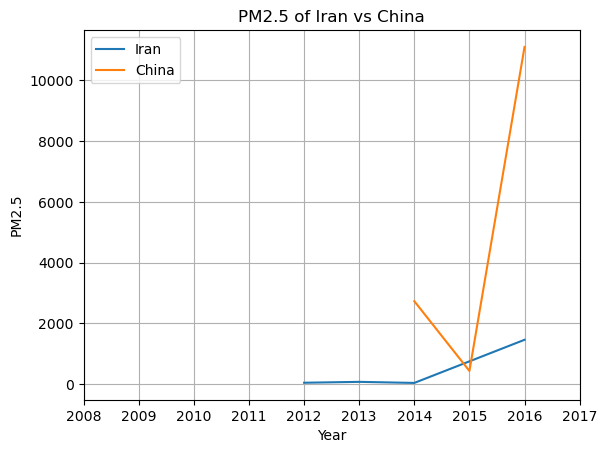

In [22]:
iran = df[df['Country'] == "Iran"].groupby("Year")['PM2.5'].sum()
china = df[df['Country'] == "China"].groupby("Year")['PM2.5'].sum()

plt.plot(iran.index, iran.values, label="Iran")
plt.plot(china.index, china.values, label="China")
plt.xticks(df['Year'].unique())
plt.title("PM2.5 of Iran vs China")
plt.xlabel("Year")
plt.ylabel("PM2.5")
plt.legend()
plt.grid()
plt.show()

### **`Problem-2:`** Draw a histogram of the  column "PM10" of which the y-axis represents the probability (see the documentation how to draw the probability).

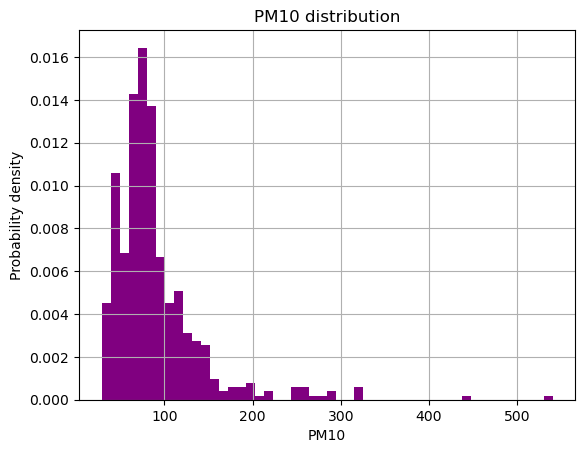

In [27]:
plt.hist(df['PM10'], density=True, bins=50, color='purple')
plt.title("PM10 distribution")
plt.xlabel("PM10")
plt.ylabel("Probability density")
plt.grid()
plt.show()

### **`Problem-3:`** Draw a scatter plot where x-axis represents "PM2.5" and y-axis represents "PM10" for two countries Poland and Chile.

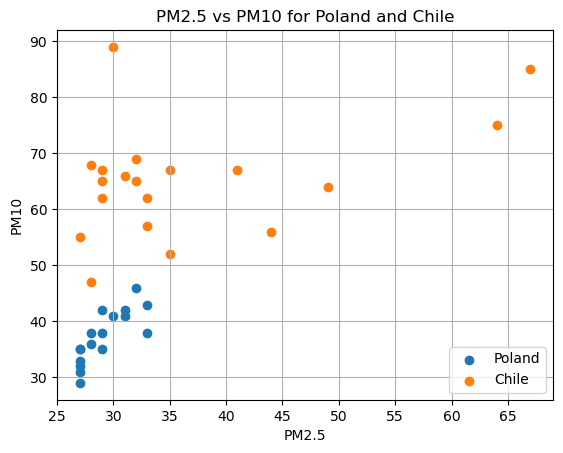

In [31]:
poland = df[df['Country'] == 'Poland']
chile = df[df['Country'] == 'Chile']

plt.scatter(poland['PM2.5'], poland['PM10'], label="Poland")
plt.scatter(chile['PM2.5'], chile['PM10'], label="Chile")
plt.title("PM2.5 vs PM10 for Poland and Chile")
plt.xlabel("PM2.5")
plt.ylabel("PM10")
plt.legend()
plt.grid()
plt.show()

### **`Problem-4:`** Draw a pie chart of top 5 most frequent countries.

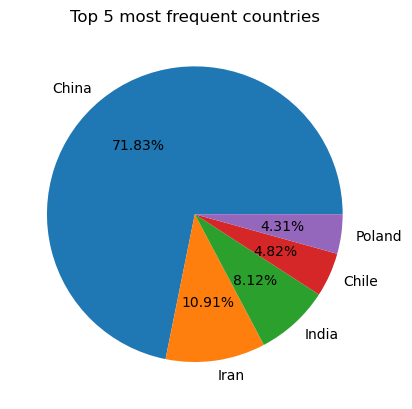

In [37]:
df['Country'].value_counts().head().plot(kind='pie', autopct='%.2f%%')
plt.title("Top 5 most frequent countries")
plt.ylabel("")
plt.show()

### **`Problem-5:`** Draw a bar chart which represents the counts of top 5 most frequent countries.



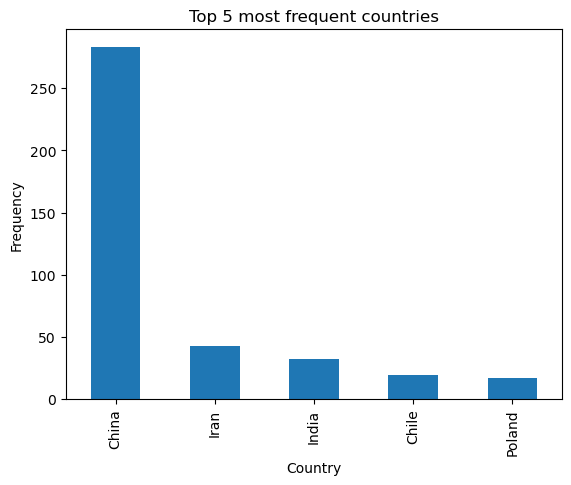

In [38]:
df['Country'].value_counts().head().plot(kind='bar')
plt.title("Top 5 most frequent countries")
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.show()

##`Problem 6-10`
Data Set - https://docs.google.com/spreadsheets/d/e/2PACX-1vTJh6X4_mqixWsfK9mgkllGQkKYW9Wj9kOIMGY2uYsWeS8n5np87DO-SDGQWJ1HXEnxiOVFVzYFYEcR/pub?gid=558678488&single=true&output=csv

This is a Sales data of any company in a Year.


###`Problem-6`
Show a line plot of Total Profit for each month with below styling.
* Dotted Line
* Line Color Blue
* Show Legend at top left
* Circle Marker

In [41]:
sales = pd.read_csv("./company_sales_data - company_sales_data.csv")
sales.head()

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600


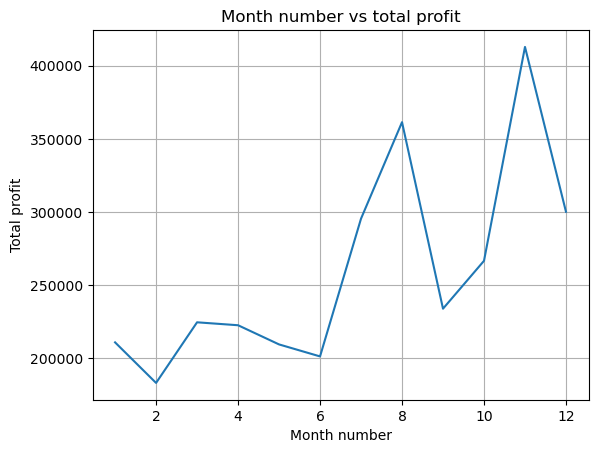

In [47]:
plt.plot(sales['month_number'], sales['total_profit'])
plt.title("Month number vs total profit")
plt.xlabel("Month number")
plt.ylabel("Total profit")
plt.grid()
plt.show()

###`Problem-7`
Show sales of each product in march month as pie chart.
* Show Percentage value
* Give Title "Sales in March"
* Explode ToothPaste with shadow

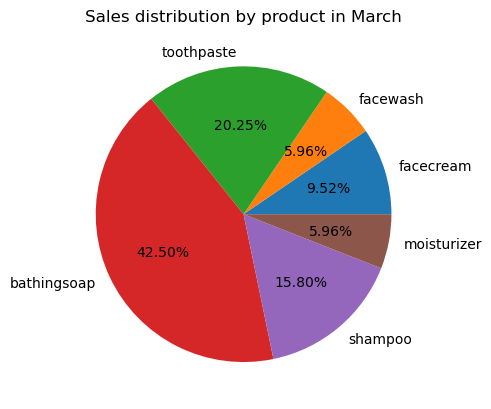

In [82]:
march = sales[sales['month_number'] == 3]
temp = march.T[1:].reset_index().rename(columns={'index':'product', 2:'sales'})
total_sales = temp.iloc[:-2, -1].values.sum()
to_plot= temp.iloc[:-2,-1]/total_sales
plt.pie(to_plot, labels=temp.iloc[:-2,0], autopct="%.2f%%")
plt.title("Sales distribution by product in March")
plt.show()

###`Problem-8` Multiline Plot of all products sales.
* Give different styes for each products
* Add legend at top right

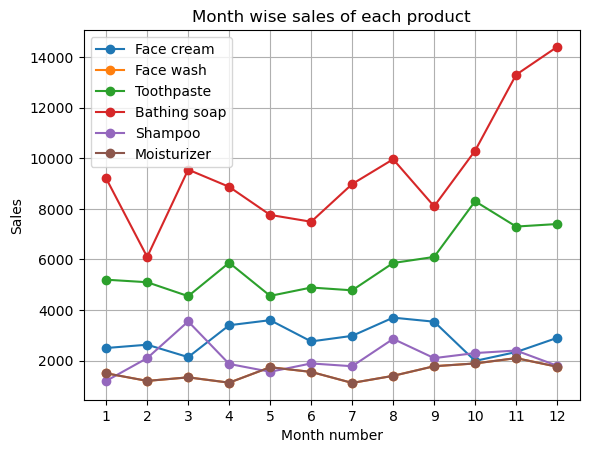

In [96]:
plt.plot(sales['month_number'], sales.loc[:,'facecream'].values, marker='o', label="Face cream")
plt.plot(sales['month_number'], sales.loc[:,'facewash'].values, marker='o',label='Face wash')
plt.plot(sales['month_number'], sales.loc[:,'toothpaste'].values, marker='o', label="Toothpaste")
plt.plot(sales['month_number'], sales.loc[:,'bathingsoap'].values, marker='o', label="Bathing soap")
plt.plot(sales['month_number'], sales.loc[:,'shampoo'].values, marker='o', label="Shampoo")
plt.plot(sales['month_number'], sales.loc[:,'moisturizer'].values, marker='o', label="Moisturizer")

plt.xticks(sales['month_number'].unique())
plt.title("Month wise sales of each product")
plt.xlabel("Month number")
plt.ylabel("Sales")
plt.legend()
plt.grid()
plt.show()

###`Problem-9` Show Quarter wise Sales data for all products as multi Bar chart.


In [97]:
q1 = sales[sales['month_number'] <=3]['']
q2 = sales[(sales['month_number'] >=4) & (sales['month_number']<=6)]
q3 = sales[(sales['month_number'] >=7) & (sales['month_number'] <=9)]
q4 = sales[sales['month_number'] >= 10]

In [160]:
q1_sales = q1.T.iloc[1:].iloc[:-2].sum(axis=1).reset_index().rename(columns={'index':'product', 0:'q1'})
q2_sales = q2.T.iloc[1:].iloc[:-2].sum(axis=1).reset_index().rename(columns={'index':'product', 0:'q2'})
q3_sales = q3.T.iloc[1:].iloc[:-2].sum(axis=1).reset_index().rename(columns={'index':'product', 0:'q3'})
q4_sales = q4.T.iloc[1:].iloc[:-2].sum(axis=1).reset_index().rename(columns={'index':'product', 0:'q4'})

q_sales = q1_sales.merge(q2_sales, on='product').merge(q3_sales, on='product').merge(q4_sales, on='product')

In [161]:
q_sales = q_sales.T
q_sales.columns = q_sales.iloc[0,:]
q_sales = q_sales.iloc[1:, :]
q_sales

product,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer
q1,7270,4040,14850,24850,6850,4040
q2,9760,4425,15320,24120,5320,4425
q3,10220,4300,16740,27040,6740,4300
q4,7230,5750,23000,38000,6500,5750


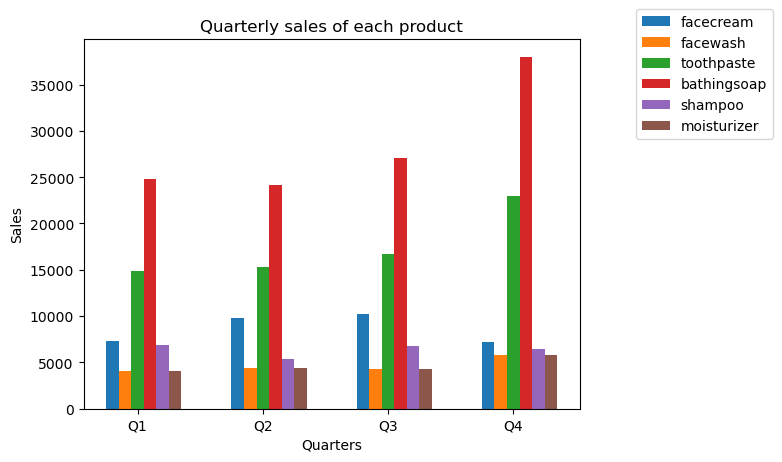

In [175]:
plt.bar(np.arange(q_sales.shape[0])-0.2, q_sales['facecream'], width=0.1, label='facecream')
plt.bar(np.arange(q_sales.shape[0])-0.1, q_sales['facewash'], width=0.1, label='facewash' )
plt.bar(np.arange(q_sales.shape[0]), q_sales['toothpaste'], width=0.1, label='toothpaste')
plt.bar(np.arange(q_sales.shape[0])+0.1, q_sales['bathingsoap'], width=0.1, label='bathingsoap')
plt.bar(np.arange(q_sales.shape[0])+0.2, q_sales['shampoo'], width=0.1, label='shampoo')
plt.bar(np.arange(q_sales.shape[0])+0.3, q_sales['moisturizer'], width=0.1, label='moisturizer')
plt.xticks(np.arange(4), ['Q1', 'Q2', 'Q3', 'Q4'])
plt.title("Quarterly sales of each product")
plt.xlabel("Quarters")
plt.ylabel("Sales")
plt.legend(bbox_to_anchor=(1.1,1.1))
plt.show()

###`Problem-10` Plot Stacked Bar chart quarter wise for each product.

In [182]:
q_sales

product,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer
q1,7270,4040,14850,24850,6850,4040
q2,9760,4425,15320,24120,5320,4425
q3,10220,4300,16740,27040,6740,4300
q4,7230,5750,23000,38000,6500,5750


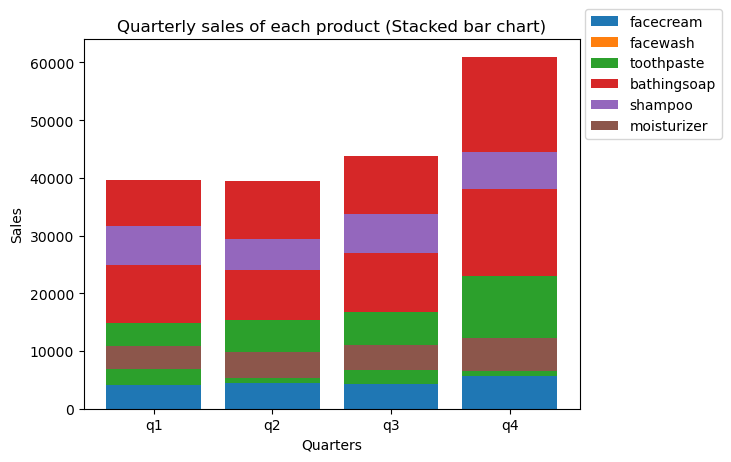

In [194]:
plt.bar(np.arange(4), q_sales['facecream'], label='facecream')
plt.bar(np.arange(4), q_sales['facewash'], bottom=q_sales['facecream'], label='facewash')
plt.bar(np.arange(4), q_sales['toothpaste'], bottom=q_sales['facewash'], label='toothpaste')
plt.bar(np.arange(4), q_sales['bathingsoap'], bottom=q_sales['toothpaste'], label='bathingsoap')
plt.bar(np.arange(4), q_sales['shampoo'], bottom=q_sales['bathingsoap'], label='shampoo')
plt.bar(np.arange(4), q_sales['moisturizer'], bottom=q_sales['shampoo'], label='moisturizer')
plt.xticks(np.arange(4), q_sales.index)
plt.title("Quarterly sales of each product (Stacked bar chart)")
plt.xlabel("Quarters")
plt.ylabel("Sales")
plt.legend(bbox_to_anchor=(1.3,1.1))
plt.show()

In [200]:
q_sales.sum(axis=0)

product
facecream       34480
facewash        18515
toothpaste      69910
bathingsoap    114010
shampoo         25410
moisturizer     18515
dtype: object